LSTM for time-series forecasting

In [1]:
import pandas as pd

## Dataset

In [2]:
pth = "./data/household_power_consumption.txt"

In [3]:
pd.read_csv(pth, nrows=100, sep=";")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
95,16/12/2006,18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0
96,16/12/2006,19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0
97,16/12/2006,19:01:00,3.612,0.090,232.36,15.6,0.0,2.0,16.0
98,16/12/2006,19:02:00,3.458,0.090,232.71,14.8,0.0,1.0,17.0


In [5]:
df = pd.read_csv(pth, sep=";", usecols=["Date", "Time", "Global_active_power"])
df.head()

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [6]:
df.shape

(2075259, 3)

In [8]:
df["dt"] = pd.to_datetime(df["Date"]+" "+df["Time"], format="%d/%m/%Y %H:%M:%S")

In [12]:
df = df.rename(columns={"Global_active_power": "power"})

In [13]:
df.head()

,Date,Time,power,dt
0,16/12/2006,17:24:00,4.216,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,2006-12-16 17:28:00


In [16]:
df = df.query("power != '?'")

In [17]:
def convert(t):
    try:
        return float(t)
    except:
        print(t)
        return 0

In [33]:
df["power"] = df["power"].astype(float)

In [34]:
df.head()

,Date,Time,power,dt,dt2
0,16/12/2006,17:24:00,4.216,2006-12-16 17:24:00,2006-12-16 17:00:00
1,16/12/2006,17:25:00,5.360,2006-12-16 17:25:00,2006-12-16 17:00:00
2,16/12/2006,17:26:00,5.374,2006-12-16 17:26:00,2006-12-16 17:00:00
3,16/12/2006,17:27:00,5.388,2006-12-16 17:27:00,2006-12-16 17:00:00
4,16/12/2006,17:28:00,3.666,2006-12-16 17:28:00,2006-12-16 17:00:00


In [35]:
df2 = df.set_index("dt")["power"].resample("1H").sum()
df2.head()

dt
2006-12-16 17:00:00    152.024
2006-12-16 18:00:00    217.932
2006-12-16 19:00:00    204.014
2006-12-16 20:00:00    196.114
2006-12-16 21:00:00    183.388
Freq: H, Name: power, dtype: float64

<AxesSubplot:xlabel='dt'>

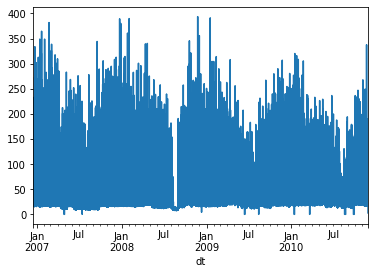

In [36]:
df2.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
result = seasonal_decompose(df2)

<AxesSubplot:xlabel='dt'>

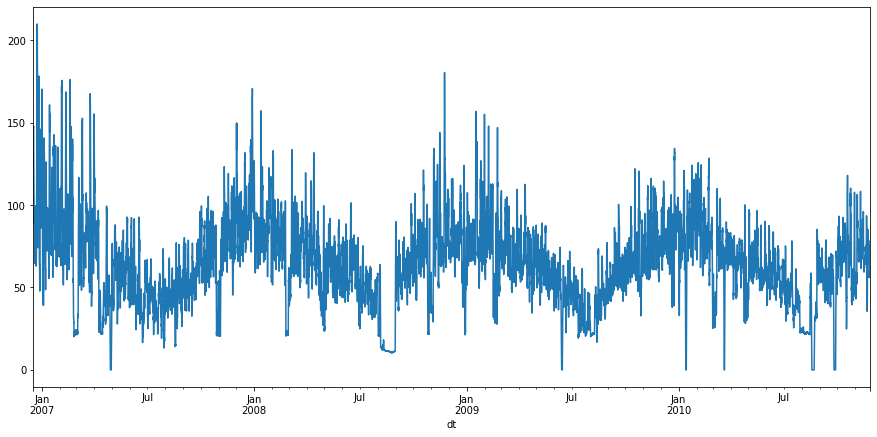

In [42]:
result.trend.plot(figsize=(15, 7))

<AxesSubplot:xlabel='dt'>

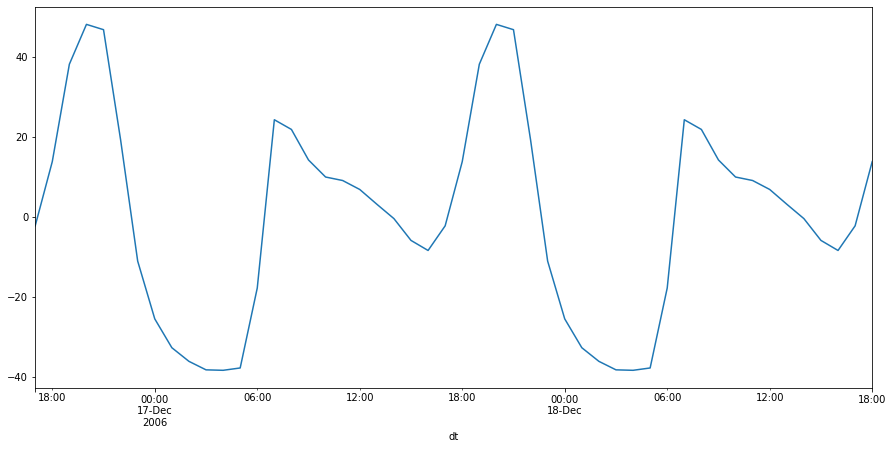

In [58]:
result.seasonal[:50].plot(figsize=(15, 7))

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


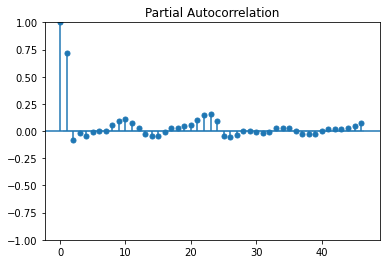

In [52]:
plot_pacf(df2);

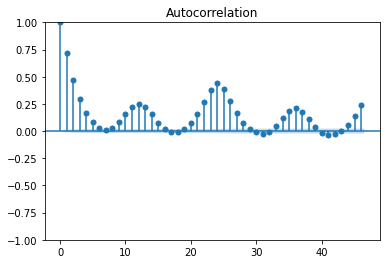

In [53]:
plot_acf(df2);

In [54]:
df2.head()

dt
2006-12-16 17:00:00    152.024
2006-12-16 18:00:00    217.932
2006-12-16 19:00:00    204.014
2006-12-16 20:00:00    196.114
2006-12-16 21:00:00    183.388
Freq: H, Name: power, dtype: float64

In [55]:
df2.to_csv("./data/household_power_consumption_v2.txt")